# To get access to the dataset:
- Clone repo using the command below <br>
- "git clone https://github.com/clemnyan/ENGS_108_Fall_2021.git" <br>
- all datasets are located in the "datasets" folder of the cloned repo

## **Problem 1: Support Vector Machines**
In this problem, you will be building a support vector machines to for both regression and classification tasks.
>
> **Part 1** In this part we will be exploring the *circles* dataset. In this dataset you will have an $X$ array of 2 dimensional samples of the form $(x_1, x_2)$ and a $y$ array of each samples associated label. 
>> **(a)** Go through the circles dataset and create a scatterplot of the circles data using the y label of each samples color to designate their respective class.

Text(0.5, 1.0, 'scatterplot of circle points')

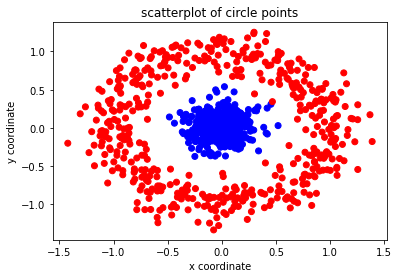

In [1]:
#Code and explanation for 1a

#loading data 
from matplotlib import pyplot as plt
import numpy as np
import pickle  #check documentation to open pickled file
circlePoints, circleLabels = pickle.load(open("datasets/circles.pk","rb"))
xCircle = circlePoints[:,0]
yCircle = circlePoints[:,1]
colormap = np.array(["r", "b"])
colorVec = colormap[circleLabels]
plt.scatter(xCircle, yCircle,marker="o",c = colorVec)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title("scatterplot of circle points")


>> **(b)** Is this dataset linearly seperable? Explain why or why not?

In [2]:
#Code and explanation for 1b
# no, this data is not linearly separable. Any line separating this plane
# would have at least 1 half plane with both blue and red dots in it
# To show this, we can run a linear SVM and show that it has non-zero error:
import cv2

#train linear svm
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1.e-06))
svm.train(np.float32(circlePoints), cv2.ml.ROW_SAMPLE, (circleLabels))

# calculate training predictions
_, train_results = svm.predict(np.float32(circlePoints))
train_results = train_results[:,0]

# calculate train accuracy
train_errors = np.abs(np.subtract(train_results,circleLabels))
train_accuracy = 1 - sum(train_errors)/len(train_results)
print("training accuracy: " + str(train_accuracy))


training accuracy: 0.69


>> **(c)** Can you think of a transformation of the dataset that could make the dataset linearly seperable? If so, define what these transformation function(s) might look like, and if not explain why. *Hint: Think of a higher dimensional space.*

# Code and explanation for 1c
yes, I think this could be separable in a higher dimensional space, 
by transforming the features into polar coordinates
r = sqrt(x^2 + y^2)
theta = tan-1(y/x)
For our purposes, we don't actually need theta. We should be able to separate the dataset
by just using the circle x^2+y+2 = R^2

>> **(d)** If you where able to find a transformation in (c), create a suitable graph showing the dataset is linearly seperable in this new feature space.

training accuracy: 0.998


Text(0.5, 1.0, 'scatterplot of transformed circle points')

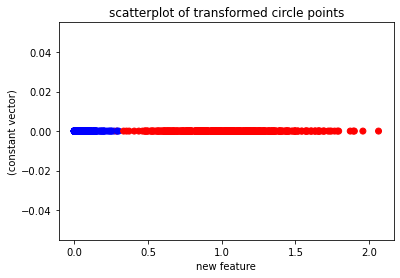

In [3]:
#Code and explanation for 1d
new_features = np.power(xCircle,2) + np.power(yCircle, 2)

#train linear svm
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1.e-06))
svm.train(np.float32(new_features), cv2.ml.ROW_SAMPLE, (circleLabels))

# calculate training predictions
_, train_results = svm.predict(np.float32(new_features))
train_results = train_results[:,0]

# calculate train accuracy
train_errors = np.abs(np.subtract(train_results,circleLabels))
train_accuracy = 1 - sum(train_errors)/len(train_results)
print("training accuracy: " + str(train_accuracy))

yDummy = [0]*len(new_features)
plt.scatter(new_features, yDummy,marker="o",c = colorVec)
plt.xlabel('new feature')
plt.ylabel('(constant vector)')
plt.title("scatterplot of transformed circle points")

# the training accuracy appears to be 99.8%.
# this is near perfect, which is what we would expect by looking
# at the scatter plot, which clearly shows that there is one blue point
# with a smaller radius than on of the red points
# hence the dataset is not 100% separable... but it is close!



> **Part 2** What we accomplished in Part 1 is known as the kernel trick for SVMs. Now let's focus on how we can use this idea to accomplish non-linear classification on a real world dataset. In this next part and throughout the remainder of the assignment we will be using a food image dataset. These images are RGB images of many pixels. 
>> **(a)** You have been given a number of code skeletons throughout the course all of which load and preprocess the data for you. In this excerise tho, we will be doing the data loading manually as it is an important skill to learn. Write some code that will walk through the *ExampleFoodImageDataset* directory structure and build a single large numpy array with all image features flattened into a large vector (Make sure to resize the image to something like (28, 28) or (32, 32), etc.) the first column being a integer id for the class. *Hint: You have been provided with a basic skeleton, study the operations of the code and finish the script.*

In [7]:
#Code and explanation for 2a
from PIL import Image
import tqdm
import os

dataset_github_path = 'datasets/'
#-- The dimensions of the resized image
RESIZE = (28,28)
#-- A map from integer ids to food categories (strings)
food_map = {
    "sushi": 0,
    "sashimi": 1,
    "pizza": 2,
    "hot_dog": 3,
    "hamburger": 4,
    "greek_salad": 5,
    "french_fries": 6,
    "caprese_salad": 7,
    "caesar_salad": 8
}
#-- The data list that we will be filling in.
data = []
#-- The folder that the food images are in
folder = os.path.join(dataset_github_path, 'ExampleFoodImageDataset')
labels = []

#-- Let's start our for loop (Just using tqdm to give us a pretty progress bar).
for idx, subfold in enumerate(tqdm.tqdm(os.listdir(folder), desc='Processing images', leave=False)):                                                                             
  if os.path.isdir(os.path.join(folder, subfold)):
    #-- We have found image class folder so let's extract all example data
    food_map[idx] = subfold
    for img_name in os.listdir(os.path.join(folder, subfold)):
      #-- Make sure the file is an image
      if img_name.endswith('.jpg'):
        newImage = np.array(Image.open(os.path.join(folder, subfold,img_name), mode='r'))
        newImage = cv2.resize(newImage, RESIZE)
        flattenedVec = newImage.flatten()
        data.append(flattenedVec)
        labels.append(food_map[subfold])

data = np.array(data)
labels = np.array(labels)

# all data adds the labels as the first column. 
# but it doesn't serve any purposes here, as the svm function
# takes the labels and featues as separate arguments
all_data = np.concatenate((labels.reshape(labels.shape[0],-1), data), 1)


>> **(b)** Split your dataset into training and testing sets with an 80/20 split. *Hint: Look at Sklearn's train_test_split function.* Then implement a SVM classifer and report your accuracy on the testing dataset.

#Code and explanation for 2b
the function below splits the dataset into a train and test set and then trains the svm with the specified kernel, and prints/returns the training and test accuracy. I first did this with all of the kernels available in cv2 to see which ones performed best, using the trainAuto function to automatically tune the hyperparameters. 

In [53]:

def SVMWithKernel(data, labels,kernelType):
    msk = np.random.rand(len(data)) < 0.8
    train_data = data[msk]
    test_data = data[~msk]
    train_labels = labels[msk]
    test_labels = labels[~msk]
    
    svm = cv2.ml.SVM_create()
    svm.setType(cv2.ml.SVM_C_SVC)
    if (kernelType == "POLY"):
        svm.setKernel(cv2.ml.SVM_POLY)
        svm.setDegree(2)
    elif (kernelType == "SIGMOID"):
        svm.setKernel(cv2.ml.SVM_SIGMOID)
    elif (kernelType == "CHI2"):
        svm.setKernel(cv2.ml.SVM_CHI2)
    elif (kernelType == "INTER"):
        svm.setKernel(cv2.ml.SVM_INTER)
    elif (kernelType == "RBF"):
        svm.setKernel(cv2.ml.SVM_RBF)
    else:
        svm.setKernel(cv2.ml.SVM_LINEAR)
    svm.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1.e-06))
    svm.trainAuto(np.float32(train_data), cv2.ml.ROW_SAMPLE, (train_labels))
    # calculate training predictions
    _, train_results = svm.predict(np.float32(train_data))
    train_results = train_results[:,0]

    # calculate train accuracy
    train_errors = np.not_equal(train_results,train_labels)
    train_accuracy = 1 - sum(train_errors)/len(train_results)
    print(kernelType + " kernel training accuracy: " + str(train_accuracy))
    
    # calculate testing predictions
    _, test_results = svm.predict(np.float32(test_data))
    test_results = test_results[:,0]
    
    # calculate test accuracy
    test_errors = np.not_equal(test_results,test_labels)
    test_accuracy = 1 - sum(test_errors)/len(test_results)
    print(kernelType+ " kernel testing accuracy: " + str(test_accuracy))
    
    performanceDict = {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }
    
    return(performanceDict)   

linear_acc = SVMWithKernel(data, labels, "linear")
rbf_acc = SVMWithKernel(data, labels, "RBF")
inter_acc = SVMWithKernel(data, labels, "INTER")
sigmoid_acc = SVMWithKernel(data, labels, "SIGMOID")
chi2_acc = SVMWithKernel(data, labels, "CHI2")
poly_acc = SVMWithKernel(data, labels, "POLY")



linear kernel training accuracy: 0.7017766497461929
linear kernel testing accuracy: 0.35789473684210527
RBF kernel training accuracy: 0.5697674418604651
RBF kernel testing accuracy: 0.4068627450980392
INTER kernel training accuracy: 0.946360153256705
INTER kernel testing accuracy: 0.4769230769230769
SIGMOID kernel training accuracy: 0.125
SIGMOID kernel testing accuracy: 0.13440860215053763
CHI2 kernel training accuracy: 0.9012820512820513
CHI2 kernel testing accuracy: 0.4696969696969697
POLY kernel training accuracy: 0.49937421777221525
POLY kernel testing accuracy: 0.3966480446927374


as we can see from the results, the top scoring kernels are the INTER (histogram intersection) kernel, and the CHI2 (chi-squared) kernel. This makes intuitive sense, as all other kernels still look at local spatial features in the photograph. On the other hand, histogram intersection and chi-squared kernels rely solely on histograms, and do not rely on spatial features. This means they are independent of translations, rotations, etc, and are purely a function of the shading, texture, overall color scheme, etc. This is beneficial when using a simple model architecture like SVM.

>> **(c)** Choose a 2 hyperparameters to study and experiment with. Can you make an SVM that has better accuracy then just using the defaults?

#Code and explanation for 1c
For this part, I switched to the scikit learn library for training my svm. It did not have the INTER or CHI2 kernels like cv2, so I went with the next best performing kernel:  the rbf kernel. I then exhaustively searched a 2-d parameter space using the value of C (regularization parameter) and gamma (the dispersion of the gaussian kernel) as my hyperparameters. 

In [23]:
# The data is again split into train and test parts
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]
train_labels = labels[msk]
test_labels = labels[~msk]

In [151]:
# just to mix things up and broaden my python ml knowledge,
# I'm going to use the scikit learn package for training the svm this time
from sklearn import svm
accuracies = []


cVec =  [.1,1,3,5,8,10,14,20,30]
gVec =  [.000000005,.00000001,.00000004,.00000007,.0000001,.00000015]

for cVal in cVec :
    thisRow = []
    for gVal in gVec:
        print("gamma: " + str(gVal) + ", C: "+ str(cVal))
        clf = svm.SVC(kernel='rbf',C = cVal,gamma=gVal)
        clf.fit(train_data, train_labels)

        train_results = clf.predict(np.float32(train_data))
        # calculate train accuracy
        train_errors = np.not_equal(train_results,train_labels)
        train_accuracy = 1 - sum(train_errors)/len(train_results)
        
        # calculate testing predictions
        test_results = clf.predict(np.float32(test_data))

        # calculate test accuracy
        test_errors = np.not_equal(test_results,test_labels)
        test_accuracy = 1 - sum(test_errors)/len(test_results)
        #print("rbf kernel testing accuracy: " + str(test_accuracy))
        thisRow.append(test_accuracy)
    accuracies.append(np.array(thisRow))

accuracies = np.array(accuracies)


gamma: 5e-09, C: 0.1
gamma: 1e-08, C: 0.1
gamma: 4e-08, C: 0.1
gamma: 7e-08, C: 0.1
gamma: 1e-07, C: 0.1
gamma: 1.5e-07, C: 0.1
gamma: 5e-09, C: 1
gamma: 1e-08, C: 1
gamma: 4e-08, C: 1
gamma: 7e-08, C: 1
gamma: 1e-07, C: 1
gamma: 1.5e-07, C: 1
gamma: 5e-09, C: 3
gamma: 1e-08, C: 3
gamma: 4e-08, C: 3
gamma: 7e-08, C: 3
gamma: 1e-07, C: 3
gamma: 1.5e-07, C: 3
gamma: 5e-09, C: 5
gamma: 1e-08, C: 5
gamma: 4e-08, C: 5
gamma: 7e-08, C: 5
gamma: 1e-07, C: 5
gamma: 1.5e-07, C: 5
gamma: 5e-09, C: 8
gamma: 1e-08, C: 8
gamma: 4e-08, C: 8
gamma: 7e-08, C: 8
gamma: 1e-07, C: 8
gamma: 1.5e-07, C: 8
gamma: 5e-09, C: 10
gamma: 1e-08, C: 10
gamma: 4e-08, C: 10
gamma: 7e-08, C: 10
gamma: 1e-07, C: 10
gamma: 1.5e-07, C: 10
gamma: 5e-09, C: 14
gamma: 1e-08, C: 14
gamma: 4e-08, C: 14
gamma: 7e-08, C: 14
gamma: 1e-07, C: 14
gamma: 1.5e-07, C: 14
gamma: 5e-09, C: 20
gamma: 1e-08, C: 20
gamma: 4e-08, C: 20
gamma: 7e-08, C: 20
gamma: 1e-07, C: 20
gamma: 1.5e-07, C: 20
gamma: 5e-09, C: 30
gamma: 1e-08, C: 30
ga

0.5164319248826291

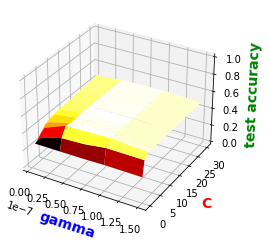

In [152]:
X,Y = np.meshgrid( gVec,cVec)
fig = plt.figure()
ax = fig.gca(projection='3d')
xLabel = ax.set_xlabel('gamma', fontsize=14, fontweight='bold', color='b')
yLabel = ax.set_ylabel('C',fontsize=14, fontweight='bold', color='r')
zLabel = ax.set_zlabel('test accuracy',fontsize=14, fontweight='bold', color='g')
surf = ax.plot_surface(X, Y, accuracies , rstride=1, cstride=2, cmap='hot', linewidth=0.1, antialiased=True)
ax.set_zlim(-.01, 1.01)
np.max(accuracies)

I performed a grid search over the parameters gamma and C, and it appears that the performance suffers significantly if gamma and C are set too low. It appears that the highest accuracy occurs when gamma is roughly .00000003, and C is roughly 10. This yields a test accuracy of 51%. below is a run of the svm with a default rbf kernel. It shows that the default value yields a test accuracy of only 43%. Which means my "optimization" outperformed the default parameters. 

In [146]:
clf = svm.SVC(kernel='rbf')
clf.fit(train_data, train_labels)

train_results = clf.predict(np.float32(train_data))
# calculate train accuracy
train_errors = np.not_equal(train_results,train_labels)
train_accuracy = 1 - sum(train_errors)/len(train_results)
print( "rbf kernel training accuracy: " + str(train_accuracy))

# calculate testing predictions
test_results = clf.predict(np.float32(test_data))

# calculate test accuracy
test_errors = np.not_equal(test_results,test_labels)
test_accuracy = 1 - sum(test_errors)/len(test_results)
print("rbf kernel testing accuracy: " + str(test_accuracy))

rbf kernel training accuracy: 0.8104575163398693
rbf kernel testing accuracy: 0.43661971830985913
